Cosntruyendo los vectores:

In [10]:
Temperatura <- rep(c('A','B','C'), each = 4, times = 3)

In [12]:
Material <- rep(c(1:3),each =12)

In [14]:
y <- c(130,155,74,180,34,40,80,75,20,70,82,58,150,188,159,126,136,122,106,115,25,70,58,45,138,110,168,160,174,120,150,139,96,104,82,60)

In [16]:
Temperatura <- as.factor(Temperatura)

In [17]:
Material <- as.factor(Material)

In [18]:
library(GAD)

Loading required package: matrixStats

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.



In [19]:
rTemperatura <- as.random(Temperatura)
rMaterial <- as.random(Material)

In [20]:
modelo <- lm(y ~ rTemperatura*rMaterial)

In [21]:
gad(modelo)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
rTemperatura,2,39118.722,19559.361,8.138054,0.03891802
rMaterial,2,10683.722,5341.861,2.222586,0.22433811
rTemperatura:rMaterial,4,9613.778,2403.444,3.559535,0.01861117
Residual,27,18230.750,675.213,NA,NA


el valor de $p$ para la interacción Temperatura/Material nos indica que la dicha interacción es significativa, por lo que no hay un material mejor que otro, sino que dependen de la temperatura que se les aplique. 

## Calculando los componentes de varianza

In [ ]:
library(lme4)
library(Matrix)

In [23]:
mod1 <- lmer(y ~ 1 + (1|Temperatura) + (1|Material) + (1|Temperatura:Material))
summary(mod1)

Linear mixed model fit by REML ['lmerMod']
Formula: 
y ~ 1 + (1 | Temperatura) + (1 | Material) + (1 | Temperatura:Material)

REML criterion at convergence: 346.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.26171 -0.48165  0.06811  0.54667  1.81758 

Random effects:
 Groups               Name        Variance Std.Dev.
 Temperatura:Material (Intercept)  432.1   20.79   
 Material             (Intercept)  244.9   15.65   
 Temperatura          (Intercept) 1429.7   37.81   
 Residual                          675.2   25.98   
Number of obs: 36, groups:  
Temperatura:Material, 9; Material, 3; Temperatura, 3

Fixed effects:
            Estimate Std. Error t value
(Intercept)    105.5       25.0   4.221

Componentes de la varianza:

In [24]:
vars <- c(432.1,244.9,1429.7,675.2)

In [25]:
porcentajes<-100*vars/sum(vars)
porcentajes <- c(round(porcentajes[1],2),round(porcentajes[2],2),round(porcentajes[3],2),round(porcentajes[4],2))
porcentajes

[1] 15.53  8.80 51.39 24.27

### Gráfica de pastel 

In [26]:
library(plotrix)

Warning message in plot.window(...):
“"clockwise" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"clockwise" is not a graphical parameter”
Warning message in title(...):
“"clockwise" is not a graphical parameter”


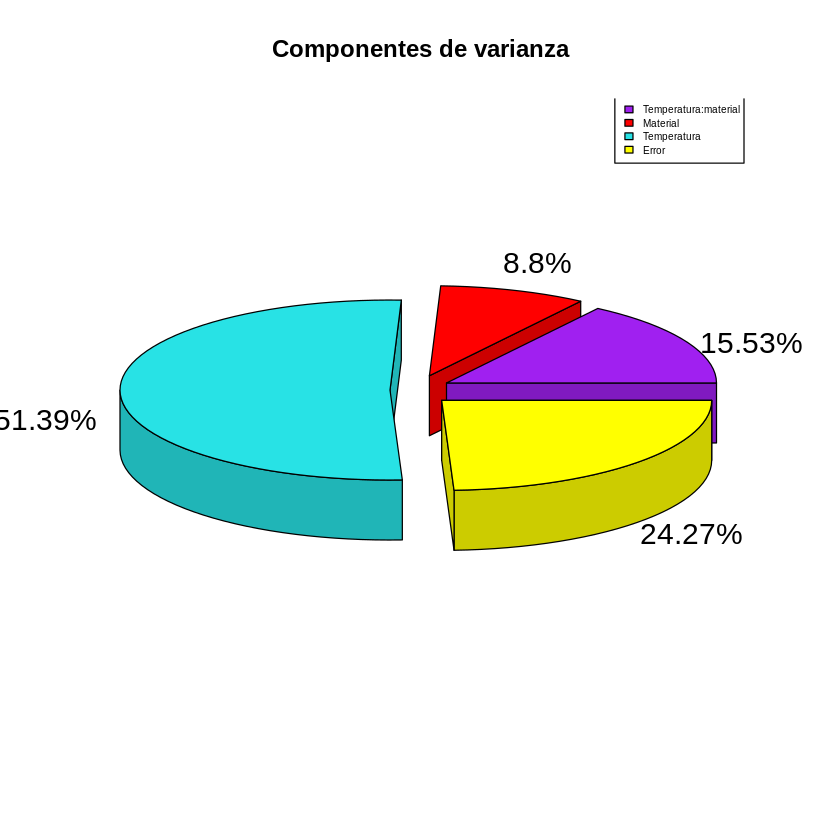

In [28]:
etiqueta<-paste(porcentajes,"%",sep = "")
colores<-c("purple","red","541","yellow")

pie3D(porcentajes,labels = etiqueta,radius=0.9,explode=0.1,main="Componentes de varianza",clockwise=TRUE,col=colores)

#Leyenda
legend("topright",c("Temperatura:material","Material","Temperatura","Error"),cex=0.5,fill=colores)

La temperatura es el factor que tiene mayor variación.

## Verificando los supuestos del modelo

Normalidad de los residuos:

In [29]:
residuos<-modelo$res
residuos

1      2      3      4      5      6      7      8      9     10     11 
 -4.75  20.25 -60.75  45.25 -23.25 -17.25  22.75  17.75 -37.50  12.50  24.50 
    12     13     14     15     16     17     18     19     20     21     22 
  0.50  -5.75  32.25   3.25 -29.75  16.25   2.25 -13.75  -4.75 -24.50  20.50 
    23     24     25     26     27     28     29     30     31     32     33 
  8.50  -4.50  -6.00 -34.00  24.00  16.00  28.25 -25.75   4.25  -6.75  10.50 
    34     35     36 
 18.50  -3.50 -25.50

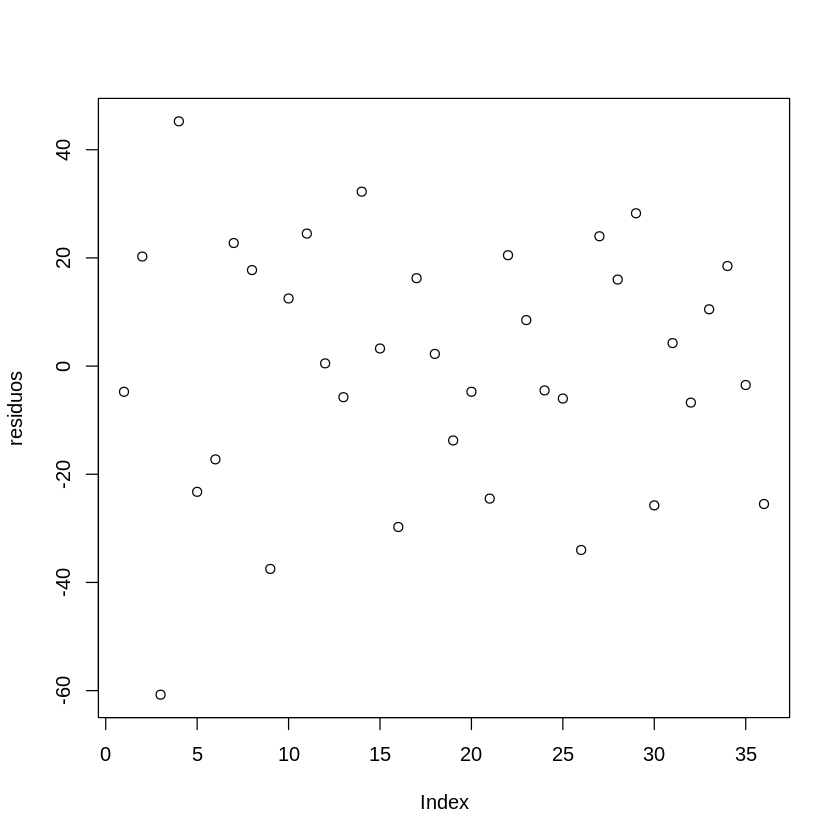

In [30]:
plot(residuos)

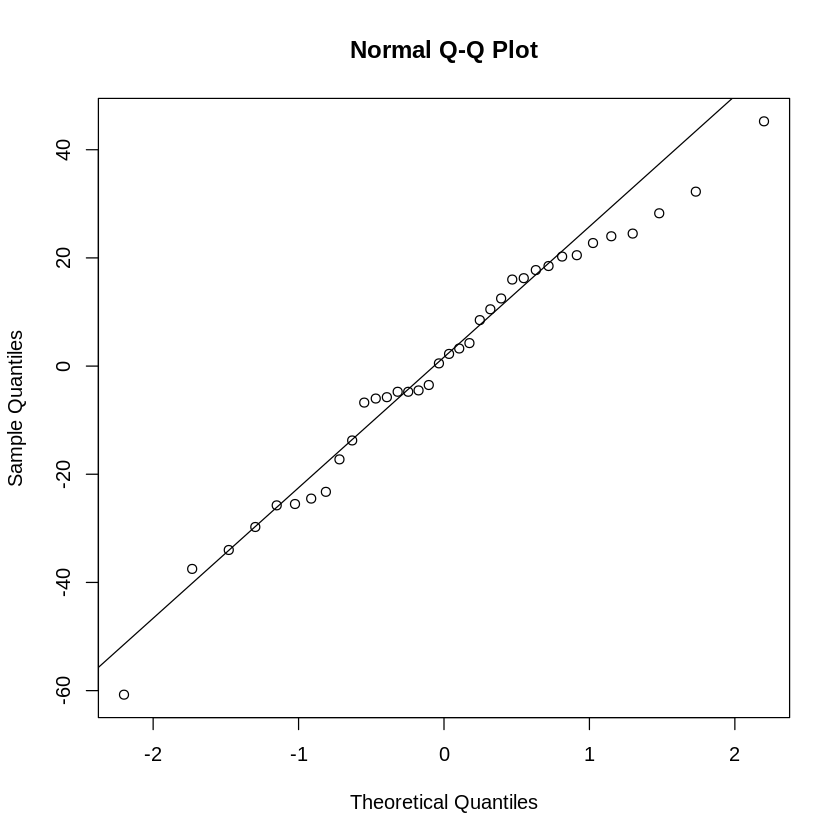

In [31]:
qqnorm(residuos)
qqline(residuos)

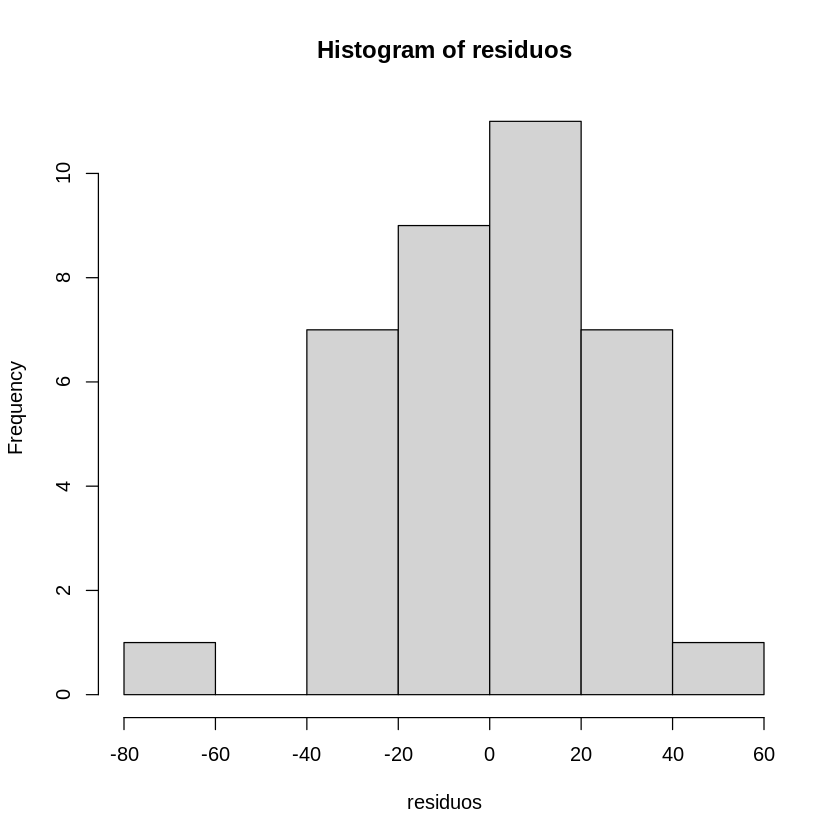

In [32]:
hist(residuos)

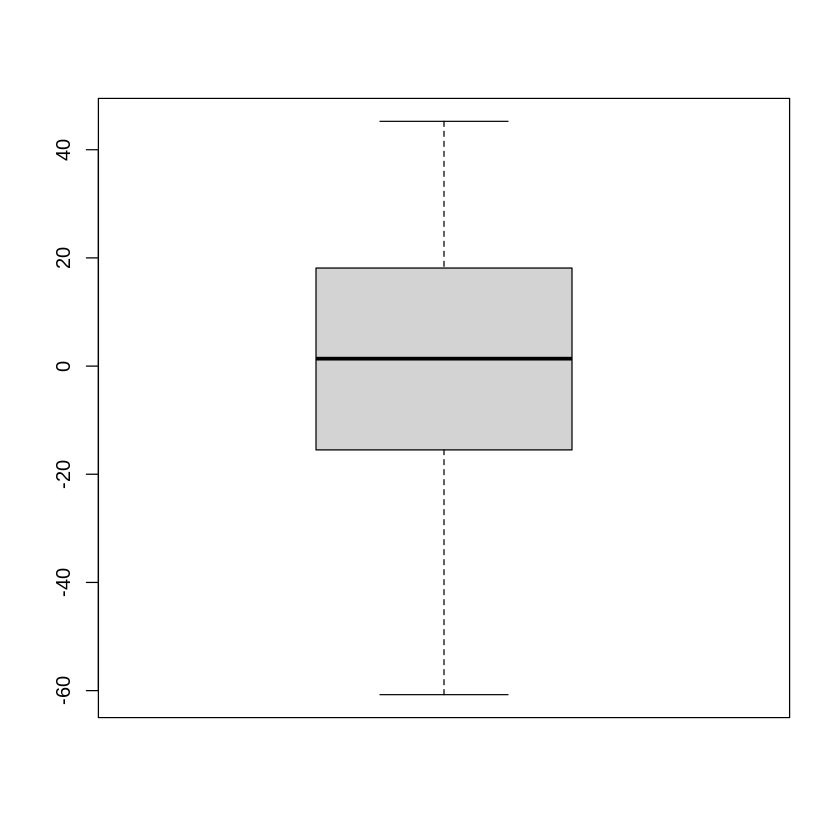

In [33]:
boxplot(residuos)

In [34]:
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.97606, p-value = 0.6117


No se rechaza la hipótesis nula, por lo que los residuos sí tienen  una distribución normal.

Independencia de los residuos:

In [ ]:
library(tseries)

In [36]:
####Ho: No hay correlacion (prueba de rachas, para probar no correlacion de residuos)
runs.test(as.factor(modelo$residual>0))


	Runs Test

data:  as.factor(modelo$residual > 0)
Standard Normal = 0.6974, p-value = 0.4855
alternative hypothesis: two.sided


No se rechaza $H_0$ por lo que los residuos no tienen correlación entre ellos.

**Conclusión**: